In [77]:
'''
PROMPT:
Find a data set and build a KNN Regression and an OLS regression. 
Compare the two. 
How similar are they? 
Do they miss in different ways?
'''


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

# Hit capcoin's api to read the 30 day history of Bitcoin (BTC)
# BTC = pd.read_json('http://socket.coincap.io/history/30day/BTC')
#BTC = BTC.to_csv('C:\\Users\\maken\\BTC\\BTC.csv')
BTC = pd.read_csv('C:\\Users\\maken\\BTC\\BTC.csv')

In [78]:
# Print the headers to make sure the data looks ok
BTC.head()

,market_cap,price,volume
0,"[1495921749000, 32618541566]","[1495921749000, 1994.35]","[1495921749000, 1747740000]"
1,"[1495925350000, 33498722140]","[1495925350000, 2048.15]","[1495925350000, 1734500000]"
2,"[1495928949000, 33203215899]","[1495928949000, 2030.07]","[1495928949000, 1689320000]"
3,"[1495932551000, 34259238161]","[1495932551000, 2094.62]","[1495932551000, 1762320000]"
4,"[1495936150000, 34510536391]","[1495936150000, 2109.97]","[1495936150000, 1782030000]"


In [182]:
def valuation_formula(variable, row, n):
    value = row[variable]
    value = value.strip('[').strip(']').split(', ')
    return float(value[n])

#df['price'] = df.apply(lambda row: valuation_formula(row['x'], row['y']), axis=1)
                                 
BTC['market_cap_high'] = BTC.apply(lambda row: valuation_formula('market_cap', row, 1), axis=1).dropna()
BTC['market_cap_low'] = BTC.apply(lambda row: valuation_formula('market_cap', row, 0), axis=1).dropna()
BTC['price_high'] = BTC.apply(lambda row: valuation_formula('price', row, 1), axis=1).dropna()
BTC['price_low'] = BTC.apply(lambda row: valuation_formula('price', row, 0), axis=1).dropna()

In [123]:
BTC.head()

,market_cap,price,volume,market_cap_high,market_cap_low,price_high,price_low,volume_high,volume_low,markte_cap_low
0,"[1495921749000, 32618541566]","[1495921749000, 1994.35]","[1495921749000, 1747740000]",3.261854e+10,1.495922e+12,1994.35,1.495922e+12,1,0,1495921749000
1,"[1495925350000, 33498722140]","[1495925350000, 2048.15]","[1495925350000, 1734500000]",3.349872e+10,1.495925e+12,2048.15,1.495925e+12,1,0,1495925350000
2,"[1495928949000, 33203215899]","[1495928949000, 2030.07]","[1495928949000, 1689320000]",3.320322e+10,1.495929e+12,2030.07,1.495929e+12,1,0,1495928949000
3,"[1495932551000, 34259238161]","[1495932551000, 2094.62]","[1495932551000, 1762320000]",3.425924e+10,1.495933e+12,2094.62,1.495933e+12,1,0,1495932551000
4,"[1495936150000, 34510536391]","[1495936150000, 2109.97]","[1495936150000, 1782030000]",3.451054e+10,1.495936e+12,2109.97,1.495936e+12,1,0,1495936150000


In [193]:
# accuracy_results will take the necessary data and print the results. 
btc_training_set = BTC.sample(frac=.5)
    
# create a testing set that is all of the data minus the training set
btc_testing_set = BTC[~BTC.index.isin(btc_training_set.index)]

In [125]:
btc_training_set.head()

,market_cap,price,volume,market_cap_high,market_cap_low,price_high,price_low,volume_high,volume_low,markte_cap_low
307,"[1497029653000, 46573207216]","[1497029653000, 2843]","[1497029653000, 1329920000]",4.657321e+10,1.497030e+12,2843.00,1.497030e+12,1,0,1497029653000
389,"[1497325162000, 43584869280]","[1497325162000, 2659.56]","[1497325162000, 2649410000]",4.358487e+10,1.497325e+12,2659.56,1.497325e+12,1,0,1497325162000
110,"[1496317749000, 39645102342]","[1496317749000, 2422.56]","[1496317749000, 1683310000]",3.964510e+10,1.496318e+12,2422.56,1.496318e+12,1,0,1496317749000
130,"[1496389755000, 39989903779]","[1496389755000, 2443.37]","[1496389755000, 1520210000]",3.998990e+10,1.496390e+12,2443.37,1.496390e+12,1,0,1496389755000
547,"[1497893960000, 42592047456]","[1497893960000, 2597.09]","[1497893960000, 1350230000]",4.259205e+10,1.497894e+12,2597.09,1.497894e+12,1,0,1497893960000


In [126]:
btc_testing_set.head()

,market_cap,price,volume,market_cap_high,market_cap_low,price_high,price_low,volume_high,volume_low,markte_cap_low
4,"[1495936150000, 34510536391]","[1495936150000, 2109.97]","[1495936150000, 1782030000]",3.451054e+10,1.495936e+12,2109.97,1.495936e+12,1,0,1495936150000
5,"[1495939749000, 34963894080]","[1495939749000, 2137.68]","[1495939749000, 1817600000]",3.496389e+10,1.495940e+12,2137.68,1.495940e+12,1,0,1495939749000
7,"[1495946950000, 35453044872]","[1495946950000, 2167.56]","[1495946950000, 1793800000]",3.545304e+10,1.495947e+12,2167.56,1.495947e+12,1,0,1495946950000
8,"[1495950550000, 35269526470]","[1495950550000, 2156.33]","[1495950550000, 1718910000]",3.526953e+10,1.495951e+12,2156.33,1.495951e+12,1,0,1495950550000
11,"[1495961349000, 36370228903]","[1495961349000, 2223.6]","[1495961349000, 1591310000]",3.637023e+10,1.495961e+12,2223.60,1.495961e+12,1,0,1495961349000


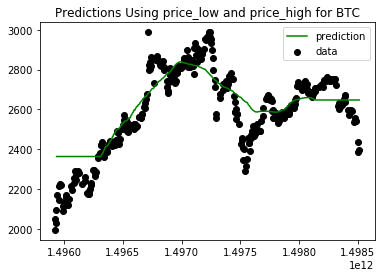

NormaltestResult(statistic=539.65150143674691, pvalue=6.5488551946189311e-118)

In [165]:
import scipy.stats as stats

# Build the KNN Model
knn = neighbors.KNeighborsRegressor(n_neighbors=100)
price_low = pd.DataFrame(btc_training_set.price_low)
price_high = pd.DataFrame(btc_training_set.price_high)
prediction = knn.fit(price_low, price_high)


T = btc_testing_set[['price_low']]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T).ravel()

plt.scatter(price_low, price_high, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Predictions Using price_low and price_high for BTC')
plt.show()


residual = btc_testing_set.price_low - Y_
stats.normaltest(residual)

Coefficients: 
 [[  1.32379021e-07]]
Intercept: 
 [-195591.20890199]


C:\Users\maken\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


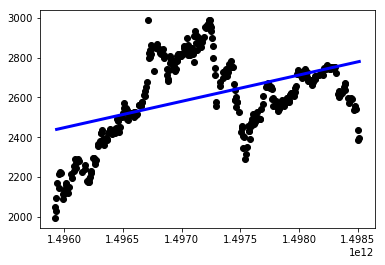

NormaltestResult(statistic=539.65074616542279, pvalue=6.5513287429065528e-118)

In [192]:
# Build the Linear Regression Model
# Instantiate our model.
ols = linear_model.LinearRegression()

# Fit our model to our data.
ols.fit(price_low, price_high)

prediction = ols.predict(btc_testing_set.price_low.reshape(-1,1)).ravel()

# Display the attributes we calculated.
print('Coefficients: \n', ols.coef_)
print('Intercept: \n', ols.intercept_)

# Plot outputs
plt.scatter(price_low, price_high, color='black')
plt.plot(btc_testing_set.price_low, prediction, color='blue', linewidth=3)
plt.show()

residual = btc_testing_set.price_low - prediction
stats.normaltest(residual)

### Comparison of the statistics of the two models:

KNN Regression Statistics:
NormaltestResult(statistic=539.65150143674691, pvalue=6.5488551946189311e-118)

Linear Regression Statistics:
NormaltestResult(statistic=539.65074616542279, pvalue=6.5513287429065528e-118)

### Both models did well, but the KNN Regression performed better, as is shown by the higher statistic score and the lower pvalue. 